# Introduction

## Introduction
In this section, you'll learn about the mechanism behind many machine learning optimization algorithms: gradient descent!

## Calculus and Solving a Linear Regression Using Gradient Descent

In this section, we're going to see how you can apply a "gradient descent" to solve a linear regression. Along the way, we'll also look at cost functions and will provide a foundation in calculus that will be valuable to you throughout your career as a data scientist.

### An Introduction to Derivatives

We're going to start off by introducing derivatives - the "instantaneous rate of change of a function" or (more graphically) the "slope of a curve". We'll start off by looking at how to calculate the slope of a curve for a straight line, and then we'll explore how to calculate the rate of change for more complex (non-linear) functions.


### Gradient Descent

Now that we know how to calculate the slope of a curve - and, by extension, to find a local minima (low point) or maxima (high point) where the curve is flat (the slope of the curve is zero), we'll look at the idea of a gradient descent to step from some random point on a cost curve to find the local optima to solve for a given linear equation. We'll also look at how best to select the step sizes for descending the cost function, and how to use partial derivatives to optimize both slope and offset to more effectively solve a linear regression using gradient descent.


## Summary

Just as we used solving a linear regression using OLS as an excuse to introduce you to linear algebra - one of the foundational elements of mathematics underpinning machine learning, we're now using the idea of gradient descent to introduce enough calculus to both understand and have good intuitions about many of the machine learning models that you're going to learn throughout the rest of the course.



# Introduction to Derivatives

## Introduction

In the linear regression section, you learned about the basic notion of mathematical functions. Now, imagine that you used the number of bedrooms as a predictor and house rental price as the target variable, you can formulate this as follows:

$$\text{price} = f(\text{number of bedrooms})$$ or, alternatively

$$ y = f(\text{x})$$

Now let's say the price of the apartment is set in a very simplified way, and there is a perfectly linear relationship between the apartment size and the rental price. Say that the price goes up by 500 USD/month for every bedroom an apartment has. In that case, we can express the price as follows:

$$\text{price} = 500 * \text{number of bedrooms}$$ or $$y = f(x) = 500 * x = 500x$$

Note that there is no intercept here! Now, we want to dive deeper into how the rental price changes as the number of bedrooms changes. This is what derivatives are all about!

## Objectives

You will be able to:

* Describe what a derivative means in the context of a real-world example
* Calculate the derivative of a linear function
* Define derivatives as the instantaneous rate of change of a function

## Let's look at our function

Our rental price example can be coded using a Python function as follows:

In [1]:
def f(x):
    return 500*x

Using matplotlib, we can visualize this as:

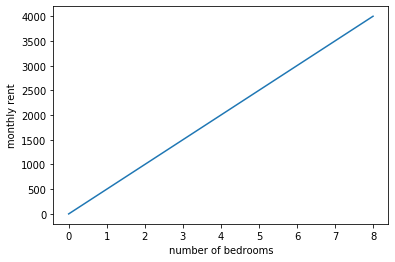

In [2]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

x = np.linspace(0, 8, 100)

plt.plot(x, f(x))
plt.xlabel("number of bedrooms")
plt.ylabel("monthly rent")
plt.show();

As you can see, we get a straight line here. 

In this lesson, we'll introduce the concept of **derivatives**. Derivatives are important because they tell us how a function is changing at any given point. We'll focus on calculating the derivatives of straight line functions, or linear functions like the function above, before moving onto calculating the derivative of curved lines in a future lesson.   

## Understanding the rate of change

To introduce derivatives, let's introduce a new example, and we'll go back to the housing example later on. Say that we want a function that represents a person taking a jog. We'll represent this by drawing the following straight line.

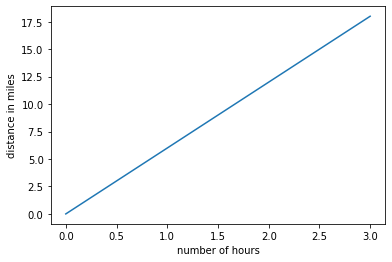

In [3]:
def jog(miles):
    return 6*miles
x = np.linspace(0, 3, 100)

plt.plot(x, jog(x))
plt.ylabel("distance in miles")
plt.xlabel("number of hours")
plt.show()

The graph above helps us see how distance changes in relation to time, or in other words speed.  So here, when we ask about the **rate of change** (which is the core concept behind derivatives), we're basically asking how fast our is jogger traveling!

## Calculating the rate of change

To calculate the miles per hour we can see where a person is at a given time, then wait an hour and to see how far he traveled.  Or we can wait two hours and divide distance traveled by two.  Generally, our technique is to divide number of miles traveled by the number of hours passed.  In this specific example, we'll imagine doing the following to calculate the speed at hour 1.

> * Start a stopwatch after one hour and note the distance at that hour
> * Then, let one hour elapse and mark down the distance at that next hour.  
> * Finally, divide the difference in the distances by the elapsed time.  

In the below graph, we begin to calculate the speed at the first hour.

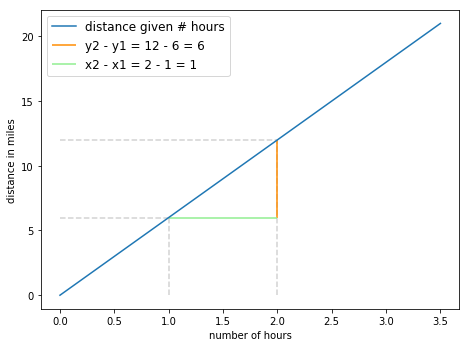

In [8]:
fig, ax = plt.subplots(figsize=(7.5,5.5))

x = np.linspace(0, 3.5, 100)

plt.plot(x, jog(x), label = "distance given # hours")

plt.hlines(y=6, xmin=0, xmax=1, linestyle = "dashed", color= 'lightgrey')
plt.vlines(x=1, ymin=0, ymax=6, linestyle = "dashed", color= 'lightgrey')

plt.hlines(y=12, xmin=0, xmax=2, linestyle = "dashed", color= 'lightgrey')
plt.vlines(x=2, ymin=0, ymax=12, linestyle = "dashed", color= 'lightgrey')

plt.vlines(x=2, ymin=6, ymax=12, color="darkorange", label = "y2 - y1 = 12 - 6 = 6")
plt.hlines(y=6, xmin=1, xmax=2, color="lightgreen", label = "x2 - x1 = 2 - 1 = 1")
ax.legend(loc='upper left', fontsize='large')

plt.ylabel("distance in miles")
plt.xlabel("number of hours")
plt.show()

We calculate our jogger's speed by seeing where he starts at hour one and ends at hour two.  Our jogger went from mile numbers six to twelve -- indicated by the orange line, so miles per hour is:

 $$ \frac{\text{miles}}{\text{hour}} = \frac {\text{end distance - start distance}}{\text{end time - start time}} = \frac {12 - 6}{2 - 1} = 6$$

Miles per hour is just one example of the rate of change. Anytime we come across the word *per*, we know this is a form of rate of change.  All forms of **rate of change** are calculated the same way: the change in the value on our $y$-axis divided by the change in the value on our $x$-axis. 

* Another way of expressing **change in $y$** is:  
   * $y_2 - y_1$ or $\Delta y$, read "delta y" 
* Likewise, another way of expressing **change in $x$** is:  
   * $x_2 - x_1$ or $\Delta x$, read "delta x"

Generally, we can say that the derivative of a straight line is equal to the "rise over the run": 

* rate of change $= \dfrac{\text{rise}}{\text{run}} = \dfrac{\Delta y}{\Delta x} = \dfrac{y_2 - y_1}{x_2 - x_1}$

Just like in our example, we saw: 

* miles per hour =  $\dfrac{\text{distance}_2 - \text{distance}_1}{\text{time}_2 - \text{time}_1} = \dfrac{12 - 6}{2 - 1} = \dfrac{6}{1} = 6$ mph

Derivatives are a specific kind of rate of change -- the rate of change of a function **at a given point**.  For a linear function as we work with here, we calculate them through rise over run, or the change in $y$ divided by the change in $x$, expressed $\dfrac{\Delta y}{\Delta x}$.  The rest of this lesson will simply be introducing more math terms and symbols for expressing this same concept.  

> Stick with us, fully understanding these will pay off when we take the derivative of more complex functions.

## Derivatives using our function expression

Since our jogger is running at a constant rate, our calculated rate of change of 6 miles per hour is also the derivative.  Of course, we already coded this before, but we know that the mathematical function for our run is

$$f(x) = 6x$$

or, in Python

In [9]:
def f(x):
    return 6*x

If we are given a function $f(x)$, we say the derivative of that function is $f'(x)$ -- read $f$ primed of $x$. 

We already can express the derivative of a linear function $f(x)$ many different ways: 

* $ f'(x) = \dfrac{\text{rise}}{\text{run}} = \dfrac{\Delta y}{\Delta x} = \dfrac{y_2 - y_1}{x_2 - x_1} =  \dfrac{f(x_2) - f(x_1)}{x_2 - x_1}$

Take a look to at the equation far to the right:
    
$$f'(x) = \frac{f(x_2) - f(x_1)}{x_2 - x_1} $$ 

You see that we replaced $y_2 - y_1$ with $f(x_2) - f(x_1)$.  This makes sense, because really when we say $y_2$ and $y_1$, we mean the function's output at the first value of $x$ and the function's output at the second value of $x$.  

We indicate that we are calculating the derivative of $f(x)$ at a specific point, say hour 1, by calling $f'(1)$.  That's the rate of change at hour 1.  Now we can plug in our values to calculate the derivative.  

* $x_1 = 1$ as hour 1 is our starting point
* $x_2 = 2$ as hour 2 is ending point starting point

giving us: 

$$f'(1) = \frac{f(2) - f(1)}{2 - 1} = \frac{12 - 6}{2 - 1} = 6 $$ 

So $f(x)$ equals the output at a given point.  And $f'(x)$ is the rate of change at a given point.  So then:
* $f(1)$ means the output at $x = 1$, or in our example, *the distance* at hour one, and 
* $f'(1)$ means the rate of change at $x = 1$, or in our example, *the speed* at hour one

Because the jogger's speed never changes throughout and since the derivative is the rate of change at a given point, we can conclude that the derivative also never changes. That's right! Let's take $x_1=3$ and $x_2=4$:

$$f'(3) = \frac{f(4) - f(3)}{4 - 3} = \frac{24 - 18}{2 - 1} = 6$$ 

Let's plot the distance from hours zero through five on the left and the speed from hours zero through five on the right to visualize this steady pace.

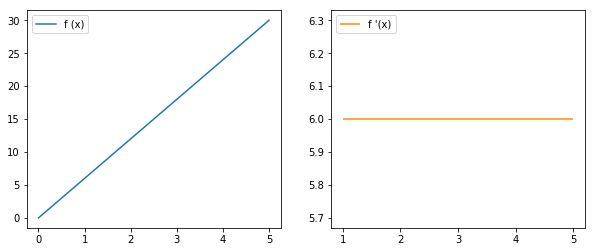

In [10]:
x = [0, 1, 2]
x = np.linspace(0, 5, 100)

fig, ax = plt.subplots(figsize=(10,4))

# plot 1
plt.subplot(121)
plt.plot(x, f(x), label = "f (x)")
plt.legend(loc="upper left", bbox_to_anchor=[0, 1],
           ncol=2, fancybox=True)

# plot 2
plt.subplot(122)
plt.hlines(y=6, xmin=1, xmax=5, color="darkorange",label = "f '(x)")
plt.legend(loc="upper left");


plt.show()

> * To the left is a graph of $f(x) = 6x$ for different values of $x$  
> * And to the right is a plot of the rate of change of that function, $f'(x)$, for different values $x$
> * So while *the distance* changes through time, *the speed*, or rate of change, stays the same

## Expressing the derivative in terms of change

Now our above formulas for calculating the derivative do the job, but they don't exactly express our technique in the example of our jogger.  Remember that our technique for calculating the jogger's speed is the following: 

> * Start a stop watch after one hour and see the distance at that hour
> * Then, let time elapse one hour and see the distance at that hour 
> * Finally, divide the difference in the distances by the elapsed time  

This is what this looks like in terms of math: 

$f'(x) = \dfrac{f(x + \Delta x) - f(x)}{\Delta x} $

Let's take a second to fully understand this new formula because it's not going away.  

* $f'(x)$ is the rate of change at a given value, or here the speed at a given time


* $f(x)$ is the distance at a given time


* $\Delta x$ is the elapsed time, or the change in $x$


* $f(x + \Delta x)$ is the distance at the starting time plus the elapsed time 

This is the definition that we will often see.  It expresses our technique for calculating the derivative.  
* Subtract the output at one input, $x$, from the output at that initial input plus a change in $x$  
* Then divide that difference by the change in $x$

In summation, that is the derivative of a line, or the rate of change of a linear function.  The rate of change answers how much is our output changing at a given point. To wrap everything up, let's look at our house rental example again!

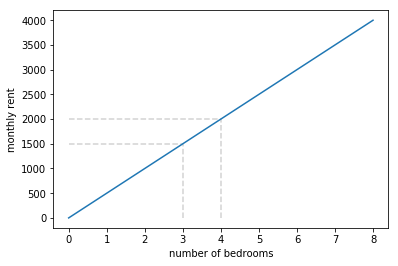

In [11]:
def f(x):
    return 500*x

import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(0, 8, 100)

plt.hlines(y=1500, xmin=0, xmax=3, linestyle = "dashed", color= 'lightgrey')
plt.vlines(x=3, ymin=0, ymax=1500, linestyle = "dashed", color= 'lightgrey')

plt.hlines(y=2000, xmin=0, xmax=4, linestyle = "dashed", color= 'lightgrey')
plt.vlines(x=4, ymin=0, ymax=2000, linestyle = "dashed", color= 'lightgrey')

plt.plot(x, f(x))
plt.xlabel("number of bedrooms")
plt.ylabel("monthly rent")
plt.show();

Using the definition of derivatives stated above, let's say $x=3$ and $\Delta x = 1$. Then:

$f'(x=3) = \dfrac{f(x + \Delta x) - f(x)}{\Delta x}= \dfrac{f(3 + 1) - f(3)}{1} = \dfrac{2000-1500}{1}= 500 $

In conclusion, our *derivative* or *rate of change* for the house rental example is equal to 500! The derivative as a function of any value $x$ is again given by a constant, and represented below:

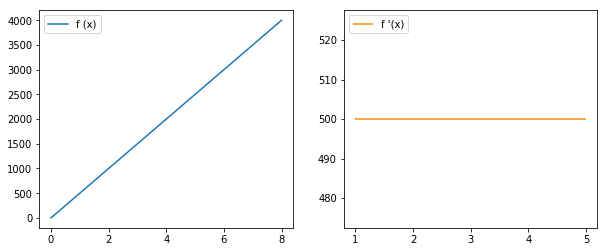

In [12]:
x = [0, 1, 2]
x = np.linspace(0, 8, 100)

fig, ax = plt.subplots(figsize=(10,4))

# plot 1
plt.subplot(121)
plt.plot(x, f(x), label = "f (x)")
plt.legend(loc="upper left", bbox_to_anchor=[0, 1],
           ncol=2, fancybox=True)

# plot 2
plt.subplot(122)
plt.hlines(y=500, xmin=1, xmax=5, color="darkorange",label = "f '(x)")
plt.legend(loc="upper left");


plt.show()

## Summary 

In this lesson, we saw that the derivative is the change in output per change in input.  In the case of our jogger, the input was time and the output was the distance traveled.  We learned that the derivative is the change in the runner's distance traveled divided by the amount of time passed.

Graphically, we see that the derivative is simply the rise over run or change in $x$ divided by change in $y$ or:

$$ f'(x) = \frac{\Delta y}{\Delta x} = \frac{y_2 - y_1}{x_2 - x_1} $$

Then we saw that we can express the derivative in terms of $f(x)$ instead of $y_1$ and $y_2$ as in the output at second $x$ minus the output at the first x divided by the difference between the two $x$ values.  Or, in an equation:

$$ f'(x) = \frac{f(x_2) - f(x_1)}{x_2 - x_1} $$

And finally we saw how we can express the derivative in terms of $\Delta x$ as in subtract the output at an initial value $x$ from the output at that initial value $x$ plus some change in $x$, then divide by that change in $x$:

$$ f'(x) = \frac{f(x + \Delta x) - f(x)}{\Delta x} $$


# Introduction to Derivatives - Lab

## Introduction
In this lab, we will practice our knowledge of derivatives. Remember that our key formula for derivatives, is 
$f'(x) = \dfrac{\Delta y}{\Delta x} =  \dfrac{f(x + \Delta x) - f(x)}{\Delta x}$.  So in driving towards this formula, we will do the following: 

1. Learn how to represent linear and nonlinear functions in code 
2. Then, because our calculation of a derivative relies on seeing the output at an initial value and the output at that value plus $\Delta x$, we need an `output_at` function
3. Then we will be able to code the $\Delta f$ function that sees the change in output between the initial $x$ and that initial $x$ plus the $\Delta x$ 
4. Finally, we will calculate the derivative at a given $x$ value, `derivative_at`

## Objectives 

You will be able to: 

- Use python functions to demonstrate derivatives of functions
- Describe what a derivative means in the context of a real-world example

## Let's begin: Starting with functions

### 1. Representing Functions

We are about to learn to take the derivative of a function in code.  But before doing so, we need to learn how to express any kind of function in code.  This way when we finally write our functions for calculating the derivative, we can use them with both linear and nonlinear functions.

For example, we want to write the function $f(x) = 2x^2 + 4x - 10 $ in a way that allows us to easily determine the exponent of each term.

This is our technique: write the formula as a numpy array. For example, for a function $f(x)= 7x^3$:

```python
arr = np.array([7, 3])
arr[0] # 7
arr[1] # 3
```

Take the following function as an example: 

$$f(x) = 4x^2 + 4x - 10 $$

We can use a [N-dimensional array](https://docs.scipy.org/doc/numpy-1.13.0/reference/arrays.ndarray.html) to represent this: 

In [1]:
import numpy as np
array_1 = np.array([[4, 2], [4, 1], [-10, 0]])
np.shape(array_1)

(3, 2)

So each row in the `np.array` represents a different term in the function.  The first column is the term's constant and the second column is the term's exponent.  Thus $4x^2$ translates to `[4, 2]` and  $-10$ translates to `[-10, 0]` because $-10$ equals $-10*x^0$.  
> We'll refer to this `np.array` as "array of terms", or `array_of_terms`.

Ok, so give this a shot. Write $ f(x) = 4x^3 + 11x^2 $ as an array of terms.  Assign it to the variable `array_2`.

In [2]:
array_2 = np.array([[4, 3], [11, 2]])

### 2. Evaluating a function at a specific point 

Now that we can represent a function in code, let's write a Python function called `term_output` that can evaluate what a single term equals at a value of $x$.  

* For example, when $x = 2$, the term $3x^2 = 3*2^2 = 12 $.  
* So we represent $3x^2$ in code as `(3, 2)`, and: 
* `term_output((3, 2), 2)` should return 12


In [3]:
def term_output(array, input_value):
    return array[0]*input_value**array[1]
term_output(np.array([3, 2]), 2) # 12

12

> **Hint:** To raise a number to an exponent in python, like 3^2 use the double star, as in:
```python
3**2 # 9 
```

Now write a function called `output_at`, when passed an `array_of_terms` and a value of $x$, calculates the value of the function at that value.  
* For example, we'll use `output_at` to calculate $f(x) = 3x^2 - 11$.  
* Then `output_at([np.array([[3, 2], [-11, 0]]), 2)` should return $f(2) = 3*2^2 - 11 = 1$. Store `np.array([[3, 2], [-11, 0]])` as `array_3`.

In [4]:
def output_at(array_of_terms, x_value):
    outputs = []
    for i in range(int(np.shape(array_of_terms)[0])):
        outputs.append(array_of_terms[i][0]*x_value**array_of_terms[i][1])
    return sum(outputs)
array_3 = np.array([[3, 2], [-11, 0]])

Verify that $f(2) = 3*2^2 - 11 = 1$.

In [5]:
output_at(array_3, 2)
# 1 

1

What value does $f(3)$ return?

In [6]:
output_at(array_3, 3)
# 16

16

Now we can use our `output_at` function to display our function graphically.  We simply declare a list of `x_values` and then calculate `output_at` for each of the `x_values`.

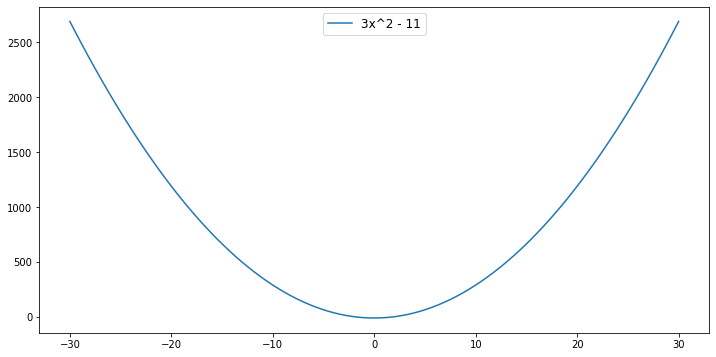

In [8]:
import numpy as np
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(12,6))
x_values = np.linspace(-30, 30, 100)
y_values = list(map(lambda x: output_at(array_3, x), x_values))

plt.plot(x_values, y_values, label = "3x^2 - 11")

ax.legend(loc="upper center",fontsize='large')
plt.show();

## Moving to derivatives of linear functions

Let's start with a function, $f(x) = 4x + 15$.  We represent the function as the following:

In [9]:
lin_function = np.array([[4, 1], [15, 0]])

We can plot the function by calculating outputs at a range of $x$ values.  Note that we use our `output_at` function to calculate the output at each individual $x$ value.

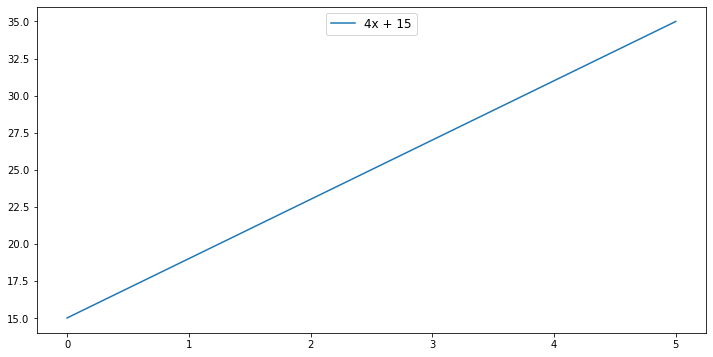

In [10]:
fig, ax = plt.subplots(figsize=(12,6))
x_values = np.linspace(0, 5, 100)
y_values = list(map(lambda x: output_at(lin_function, x), x_values))

plt.plot(x_values, y_values, label = "4x + 15")

ax.legend(loc="upper center",fontsize='large')

plt.show();

Ok, time to do what we are here for: *derivatives*.  Remember that the derivative is the instantaneous rate of change of a function, and is expressed as:

$$ f'(x) = \frac{\Delta f}{\Delta x}  = \frac{f(x + \Delta x) - f(x)}{\Delta x}  $$ 

### Writing a function for $\Delta f$

We can see from the formula above that  $\Delta f = f(x + \Delta x ) - f(x) $.  Write a function called `delta_f` that, given a `list_of_terms`, an `x_value`, and a value $\Delta x $, returns the change in the output over that period.
> **Hint** Don't forget about the `output_at` function.  The `output_at` function takes a list of terms and an $x$ value and returns the corresponding output.  So really **`output_at` is equivalent to $f(x)$**, provided a function and a value of x.

In [11]:
def delta_f(array_of_terms, x_value, delta_x):
    return output_at(array_of_terms, x_value + delta_x) - output_at(array_of_terms, x_value)
delta_f(lin_function, 2, 1) # 4

4

So for $f(x) = 4x + 15$, when $x$ = 2, and $\Delta x = 1$, $\Delta f$ is 4.  

### Plotting our function, delta f, and delta x  

Let's show $\Delta f$ and $\Delta x$ graphically.

In [12]:
x_value = 2
delta_x = 1

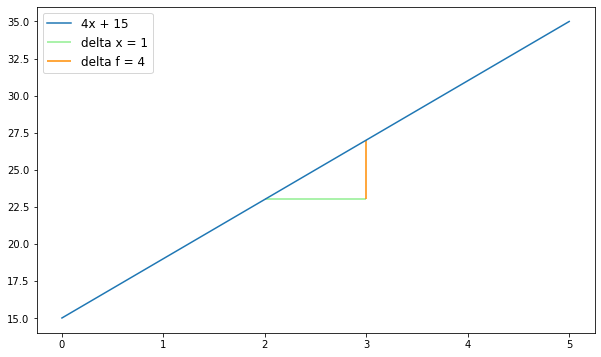

In [13]:
fig, ax = plt.subplots(figsize=(10,6))

x_values = np.linspace(0, 5, 100)
y_values = list(map(lambda x: output_at(lin_function, x), x_values))

plt.plot(x_values, y_values, label = "4x + 15")

# delta x
y_val = output_at(lin_function, x_value)
hline_lab= 'delta x = ' + str(delta_x)
plt.hlines(y=y_val, xmin= x_value, xmax= x_value + delta_x, color="lightgreen", label = hline_lab)

# delta f
y_val_max = output_at(lin_function, x_value + delta_x)
vline_lab =  'delta f = ' + str(y_val_max-y_val)
plt.vlines(x = x_value + delta_x , ymin= y_val, ymax=y_val_max, color="darkorange", label = vline_lab)
ax.legend(loc='upper left', fontsize='large')

plt.show();

### Calculating the derivative

Write a function, `derivative_at` that calculates $\dfrac{\Delta f}{\Delta x}$ when given a `array_of_terms`, an `x_value` for the value of $(x)$ the derivative is evaluated at, and `delta_x`, which represents $\Delta x$.  

Let's try this for $f(x) = 4x + 15 $.  Round the result to three decimal places.

In [14]:
def derivative_of(array_of_terms, x_value, delta_x):
    delta = delta_f(array_of_terms, x_value, delta_x)
    return round(delta/delta_x, 3)

Now let's use this function along with our stored `x_value` and `delta_x`.

In [15]:
derivative_of(lin_function, x_value=x_value, delta_x=delta_x)
# 4.0

4.0

### Building more plots

Ok, now that we have written a Python function that allows us to plot our list of terms, we can write a function called `tangent_line` that outputs the necessary terms to plot the slope of the function between initial $x$ and $x$ plus $\Delta x$. We'll walk you through this one.  

In [16]:
def tangent_line(array_of_terms, x_value, line_length = 4, delta_x = .01):
    y = output_at(array_of_terms, x_value)
    derivative_at = derivative_of(array_of_terms, x_value, delta_x)
    
    x_dev = np.linspace(x_value - line_length/2, x_value + line_length/2, 50)
    tan = y + derivative_at *(x_dev - x_value)
    return {'x_dev':x_dev, 'tan':tan, 'lab': " f' (x) = " + str(derivative_at)}

> Our `tangent_line` function takes as arguments `list_of_terms`, `x_value`, which is where our line should be tangent to our function, `line_length` as the length of our tangent line, and `delta_x` which is our $\Delta x$.


> The return value of `tangent_line` is a dictionary that represents the tangent line at that value of $x$. It uses `output_at()` to calculate the function value at a particular $x$ and the `derivative_of()` function you wrote above to calculate the slope of the tangent line. 
Next, it uses `line_length` along with the `np.linspace` to generate an array of x-values to be used as an input to generate the tangent line `tan`.

Let's look at the output of the `tangent_line()`, using our `lin_function`,  $x$ equal to 2, $\Delta_x$ equal to 0.1 and `line_length` equal to 2.

In [17]:
tan_line = tangent_line(lin_function, 2, line_length = 2, delta_x = .1)
tan_line

{'x_dev': array([1.        , 1.04081633, 1.08163265, 1.12244898, 1.16326531,
        1.20408163, 1.24489796, 1.28571429, 1.32653061, 1.36734694,
        1.40816327, 1.44897959, 1.48979592, 1.53061224, 1.57142857,
        1.6122449 , 1.65306122, 1.69387755, 1.73469388, 1.7755102 ,
        1.81632653, 1.85714286, 1.89795918, 1.93877551, 1.97959184,
        2.02040816, 2.06122449, 2.10204082, 2.14285714, 2.18367347,
        2.2244898 , 2.26530612, 2.30612245, 2.34693878, 2.3877551 ,
        2.42857143, 2.46938776, 2.51020408, 2.55102041, 2.59183673,
        2.63265306, 2.67346939, 2.71428571, 2.75510204, 2.79591837,
        2.83673469, 2.87755102, 2.91836735, 2.95918367, 3.        ]),
 'tan': array([19.        , 19.16326531, 19.32653061, 19.48979592, 19.65306122,
        19.81632653, 19.97959184, 20.14285714, 20.30612245, 20.46938776,
        20.63265306, 20.79591837, 20.95918367, 21.12244898, 21.28571429,
        21.44897959, 21.6122449 , 21.7755102 , 21.93877551, 22.10204082,
        22

Now, let's plot our function, $\Delta f$ and $\Delta x$ again along with our `rate_of_change` line.

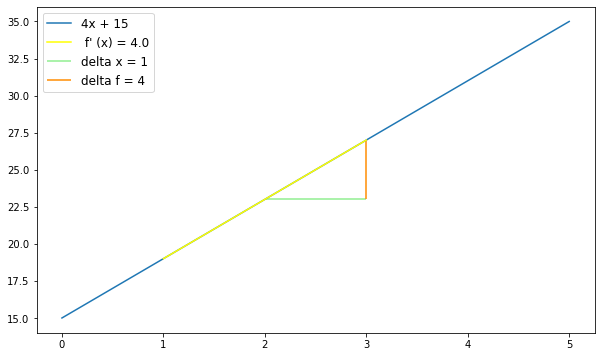

In [18]:
fig, ax = plt.subplots(figsize=(10,6))

x_values = np.linspace(0, 5, 100)
y_values = list(map(lambda x: output_at(lin_function, x), x_values))

plt.plot(x_values, y_values, label = "4x + 15")
# tangent_line
plt.plot(tan_line['x_dev'], tan_line['tan'], color = "yellow", label = tan_line['lab'])

# delta x
y_val = output_at(lin_function, x_value)
hline_lab= 'delta x = ' + str(delta_x)
plt.hlines(y=y_val, xmin= x_value, xmax= x_value + delta_x, color="lightgreen", label = hline_lab)

# delta f
y_val_max = output_at(lin_function, x_value + delta_x)
vline_lab =  'delta f = ' + str(y_val_max-y_val)
plt.vlines(x = x_value + delta_x , ymin= y_val, ymax=y_val_max, color="darkorange", label = vline_lab)
ax.legend(loc='upper left', fontsize='large')

plt.show()

So that function highlights the rate of change is moving at precisely the point $x = 2$. Sometimes it is useful to see how the derivative is changing across all $x$ values.  With linear functions, we know that our function is always changing by the same rate, and therefore the rate of change is constant.  Let's write a function that allows us to see the function and the derivative side by side.

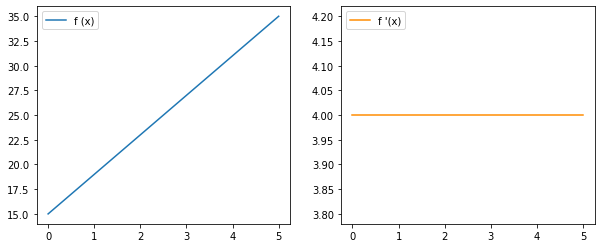

In [19]:
fig, ax = plt.subplots(figsize=(10,4))

x_values = np.linspace(0, 5, 100)
function_values = list(map(lambda x: output_at(lin_function, x),x_values))
derivative_values = list(map(lambda x: derivative_of(lin_function, x, delta_x), x_values))

# plot 1
plt.subplot(121)
plt.plot(x_values, function_values, label = "f (x)")
plt.legend(loc="upper left", bbox_to_anchor=[0, 1], ncol=2, fancybox=True)

# plot 2
plt.subplot(122)
plt.plot(x_values, derivative_values,color="darkorange", label = "f '(x)")
plt.legend(loc="upper left");

plt.show()

## Summary

In this section, we coded out our function for calculating and plotting the derivative.  We started by seeing how we can represent different types of functions.  Then we moved onto writing the `output_at` function which evaluates a provided function at a value of x.  We calculated `delta_f` by subtracting the output at initial x value from the output at that initial x plus delta x.  After calculating `delta_f`, we moved onto our `derivative_at` function, which simply divided `delta_f` from `delta_x`.  

In the final section, we plotted out some of our findings. We introduced the `tangent_line` function to get the slope for a function between an initial $x$, and $x + \Delta x $

# Derivatives of Non-Linear Functions
## Introduction
​
In the last lesson, we saw that the derivative was the rate of change and that the derivative of a straight line is a constant. Let's explore non-linear functions and their derivatives in this lesson!
## Objectives
​
You will be able to:
* Calculate the derivative of a non-linear function
## Let's get started
Let's have another look at our the plot you saw previously:

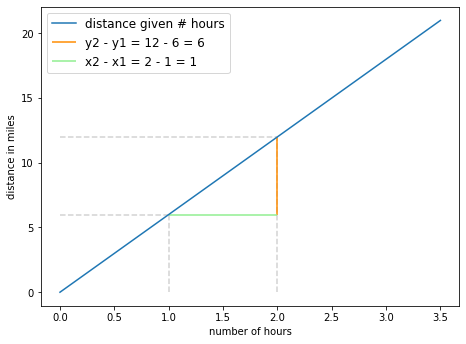

In [20]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

def jog(miles):
    return 6*miles

fig, ax = plt.subplots(figsize=(7.5,5.5))

x = np.linspace(0, 3.5, 100)

plt.plot(x, jog(x), label = "distance given # hours")

plt.hlines(y=6, xmin=0, xmax=1, linestyle = "dashed", color= 'lightgrey')
plt.vlines(x=1, ymin=0, ymax=6, linestyle = "dashed", color= 'lightgrey')

plt.hlines(y=12, xmin=0, xmax=2, linestyle = "dashed", color= 'lightgrey')
plt.vlines(x=2, ymin=0, ymax=12, linestyle = "dashed", color= 'lightgrey')

plt.vlines(x=2, ymin=6, ymax=12, color="darkorange", label = "y2 - y1 = 12 - 6 = 6")
plt.hlines(y=6, xmin=1, xmax=2, color="lightgreen", label = "x2 - x1 = 2 - 1 = 1")
ax.legend(loc='upper left', fontsize='large')

plt.ylabel("distance in miles")
plt.xlabel("number of hours")
plt.show()

Where our function was given by $f(x)=6x$. We saw multiple ways of calculating the derivative:
* Essentially, the derivative is the rate of change of a function
* Graphically this is rise over run
* Which can be calculated by taking two points, $(x_1, y_1)$ and $(x_2, y_2)$ and calculating $\frac{y_2 - y_1}{x_2 - x_1}$

Finally, we said that when we have a function $f(x)$, we can calculate the derivative with knowing the starting point $x$ and the change in our input, $\Delta x$: 

$$ \frac{f(x + \Delta x) - f(x)}{\Delta x} $$

## A non-linear function
So we saw previously that the derivative is the rate of change of our function.  We express this as $ f'(x) = \frac{\Delta f}{\Delta x}$. So far we have only calculated the derivatives with linear functions. As we'll see, things become trickier when working with more complicated functions.

For example, let's imagine that we are coaching our runner to perform in a track meet.  

![](./images/sprint.gif)

We may want to know how well our track start does at one part of the race, say the starting point, versus another point later in the race.  Then we will know what to focus on in practice.  We can imagine the distance traveled by our track star's distance through time as represented by the function $f(x) = x^2$: 

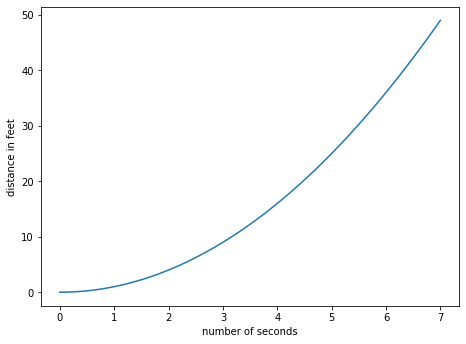

In [21]:
def f(x):
    return np.square(x)

fig, ax = plt.subplots(figsize=(7.5,5.5))

x = np.linspace(0, 7, 100)
plt.plot(x, f(x))

plt.ylabel("distance in feet")
plt.xlabel("number of seconds")
plt.show()

> The graph shows that from seconds zero through seven, our track runner gets faster over time.  


## Calculating speed at second two
Now if we want to see how quickly our track star at the 2nd second as opposed to some other second, what would we do?  Well even if we knew nothing about derivatives, we would likely get a stopwatch and at second 2 would use it to calculate the speed.  Let's say that we start our stopwatch at second 2 and stop our stopwatch one second later.

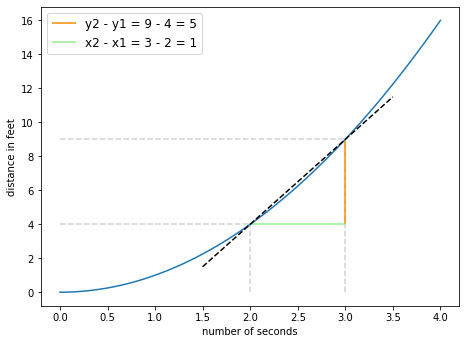

In [22]:
def f(x):
    return np.square(x)

fig, ax = plt.subplots(figsize=(7.5,5.5))

x = np.linspace(0, 4, 100)

plt.plot(x, f(x))

plt.hlines(y=9, xmin=0, xmax=3, linestyle = "dashed", color= 'lightgrey')
plt.vlines(x=2, ymin=0, ymax=4, linestyle = "dashed", color= 'lightgrey')
plt.hlines(y=4, xmin=0, xmax=2, linestyle = "dashed", color= 'lightgrey')
plt.vlines(x=3, ymin=0, ymax=9, linestyle = "dashed", color= 'lightgrey')

plt.vlines(x=3, ymin=4, ymax=9, color="darkorange", label = "y2 - y1 = 9 - 4 = 5")
plt.hlines(y=4, xmin=2, xmax=3, color="lightgreen", label = "x2 - x1 = 3 - 2 = 1")

# tangent line
x_dev = np.linspace(1.5, 3.5, 100)
a = 2
delta_a = 1
fprime = (f(a+delta_a)-f(a))/delta_a 
tan = f(a)+fprime*(x_dev-a)

# plot of the function and the tangent
plt.plot(x_dev, tan, color = "black", linestyle="dashed")

ax.legend(loc='upper left', fontsize='large')

plt.ylabel("distance in feet")
plt.xlabel("number of seconds")
plt.show()

As the graph above shows, we measure the change at second two by starting our stopwatch at second 2 and stopping it one second later.  So turning this into our formula for calculating a derivative of:  

$$ f'(x) = \frac{f(x + \Delta x) - f(x)}{\Delta x}  $$

we do the following: 
* Set $x = 2$, as that's the point we want to calculate the rate of change at 
* Set $\Delta x = 1$, as that's the number of seconds that elapsed on our stopwatch

and plugging in these values, we have: 

$$ f'(2) =  \frac{f(2 + 1) - f(2)}{ 1} =  \frac{f(3) - f(2)}{1} $$ 

So our rate of change at second number 2, with a $\Delta x = 1$ is calculated by subtracting the function's output at second 2 from the function's output at second 3 and dividing by $\Delta x=1$. 

Simplifying our calculation of $f'(x)$ further by calculating the outputs at $x = 2$ and $x = 3 $ we have:
* $f(3) = (3)^2 = 9$ is the output at $x = 3$ and 
* $f(2) = (2)^2 = 4$ is the output at $x = 2$ so 

$$f'(2) =  \frac{9 - 4}{1} = \frac{5}{1} = 5 $$

## The problem with our derivative formula
Let's take another close look at the straight line in the graph above.  That straight line is a supposed to be the rate of change of the function at the point $x = 2$.  And it comes close.  But it doesn't exactly line up.  Our black dashed line quickly begins to move above the blue line, indicating that it has a faster rate of change than the blue line at $x = 2$.  This means that our calculation that $f'(2) = 5 $ is actually too high.

Here is **the problem:**

* in our formula of $ f'(x) = \dfrac{f(x + \Delta x) - f(x)}{\Delta x} $, we are seeing the rate of change not just where $x = 2$, but from the period from $x = 2$ to $x = 3$. 
Recall that the derivative is supposed to be the **instantaneous** rate of change! However, it seems that this interval does not reflect the **instantaneous** nature!

In other words, **the runner would tell us** that we are not capturing their speed at precisely second two: 

> This is because in between the clicks of our stopwatch from seconds two to three, our runner is getting faster and while we are supposed to be calculating his speed just at second two, our calculation includes his increase in speed from seconds two to three.

> Therefore, the black dashed has a larger rate of change than the blue line because we have included this increase in speed at second three.

**A mathematician would make the same point** that we are not actually calculating the derivative: 

> Our derivative means we are calculating how fast a function is changing at any given moment, and precisely at that moment.  And unlike in where our functions were linear, here the rate of change of our function is always changing.  The larger our value of $\Delta x$, the less our derivative reflects the rate of change at just that point. 

## The solution: Decrease the change in $x$ ($\Delta x$)

If you were holding a stopwatch and someone asked you to calculate their speed at second number 2, how could you be more accurate?  Well, you would want to decrease the change in seconds.  Of course, our runner could continue to protest and say that we are still influenced by the speed at other times.

However, the mathematician has a solution to this. To calculate the rate of change at precisely one point, the solution is to use our imagination.  We calculate the derivative with a $\Delta $ of 1, then calculate it again with a $\Delta x$ of .1, then again with $\Delta x$ of .01, then again with $\Delta $ .001.  Our derivative calculation should show convergence on a single number as our $\Delta $ approaches zero and that number is our derivative.

> ** The derivative of a function is a change in the function's output across $\Delta x$, as $\Delta x $ approaches zero. **    
In this example, by decreasing $\Delta x$ we can see a fairly clear pattern.

| $ \Delta x $        | $ \frac{\Delta y}{\Delta x} $|
| ------------- |:-------------:|
| 1      | 5   |
| .1      | 4.1|
| .01 | 4.01     |
| .001 | 4.001      |

## Seeing this visually: tangent lines
Another way to see how we approach the derivative is by seeing how a line becomes more tangent to the curve as $\Delta x$ decreases.  

> Tangent to the curve means that our line is just touching the curve.

**The more that a line is tangent to the curve at a point, the more it's slope matches the derivative.**
Ok, let's get a sense of what we mean by tangent to the curve.  The black dashed line below is a line whose slope is calculated by using our derivative function, with $ \Delta x = 1$.  As you can see it is **not tangent to our function, $f(x)$ ** as it does not *just touch* the blue line, but rather touches it in two places.

In [23]:
def make_plot(delta_a):

    lab= "delta x = " + str(delta_a)
    plt.plot(x, f(x), label = lab)

    plt.hlines(y=9, xmin=1, xmax=3, linestyle = "dashed", color= 'lightgrey')
    plt.vlines(x=2, ymin=1, ymax=4, linestyle = "dashed", color= 'lightgrey')
    plt.hlines(y=4, xmin=1, xmax=2, linestyle = "dashed", color= 'lightgrey')
    plt.vlines(x=3, ymin=1, ymax=9, linestyle = "dashed", color= 'lightgrey')

    # tangent line
    x_dev = np.linspace(1.5, 3.2, 100)
    a = 2
    fprime = (f(a+delta_a)-f(a))/delta_a 
    tan = f(a)+fprime*(x_dev-a)

    # plot of the function and the tangent
    plt.plot(x_dev, tan, color = "black", linestyle="dashed")
    plt.legend(loc="upper left", bbox_to_anchor=[0, 1],
           ncol=2, fancybox=True);
    return

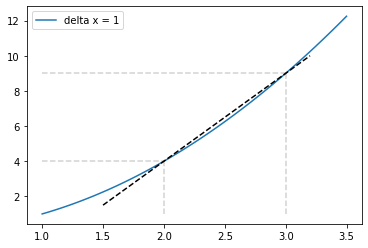

In [24]:
x = np.linspace(1, 3.5, 100)
fig, ax = plt.subplots(figsize=(6,4))
make_plot(1)

If our black dashed line had the same slope, or rate of change, as our function at that $x = 2$, it would just touch the blue line.  We know from above that we get closer to the rate of change of the function as we decrease $ \Delta x$ in our derivative formula. 

Let's look again using a smaller $\Delta x$.

Below are the plots of our lines using our derivative formula for when  $\Delta x = 1$, $\Delta x =0.1, \Delta x = 0.01$ and $\Delta x = 0.001$.


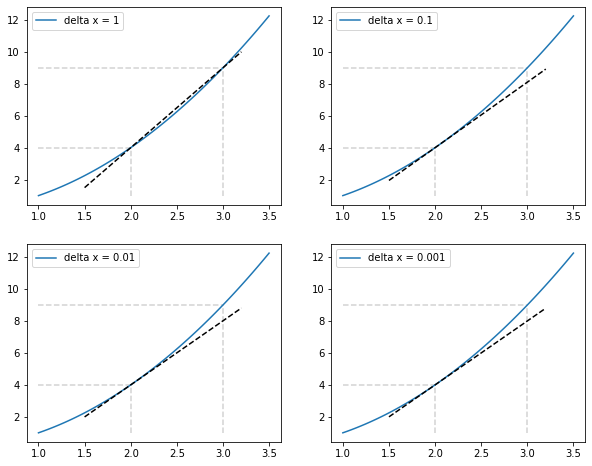

In [25]:
x = np.linspace(1, 3.5, 100)
fig, ax = plt.subplots(figsize=(10,8))

# create 4 subplots
plt.subplot(221)
make_plot(delta_a = 1)
plt.subplot(222)
make_plot(delta_a = 0.1)
plt.subplot(223)
make_plot(delta_a = 0.01)
plt.subplot(224)
make_plot(delta_a = 0.001)

Going to the top left figure to the bottom right figure, you can see that for a smaller $\Delta x$, we get a more tangent line. This is particularly visible going from $\Delta x = 1$  to $\Delta x = .1$. This is no surprise, as the difference between a slope moving from 5 to 4.1 is still visible with the naked eye, but moving from 4.1 to 4.01 to 4.001 is fairly impossible to see. 

As you can see, as $\Delta x $ approaches zero, $f'(2) $ approaches $ 4 $.  

## Approaching our formula for a derivative
So to describe the above, at the point $x = 2 $, the **limit** of $\dfrac{\Delta y}{\Delta x} $ -- that is the number that $\dfrac{\Delta y}{\Delta x} $ converges to as  $ \Delta x $ approaches zero -- is 4.  We can abbreviate this into the following expression: 
When $x = 2, \displaystyle\lim_{\Delta x\to 0} \frac{\Delta y}{\Delta x} = 4  $.

Or, better yet, we can update and correct our definition of derivative to be:

$$ f'(x) = \displaystyle {\lim_{ \Delta x \to 0}} \frac{f(x + \Delta x) - f(x)}{\Delta x} $$ 

So the derivative is the change in output as we *just nudge* our input.  That is how we calculate *instantaneous rate of change*.  We can determine the runner's speed at precisely second number 2, by calculating the runner's speed over shorter and shorter periods of time, to see what that number approaches.

One final definition before we go.  Instead of $\Delta x$, mathematicians sometimes use the variable $h$ to describe the change in inputs.  So replacing our $\Delta x$ symbols with $h$'s we have:

$$ f'(x) = \lim_{ h\to0} \frac{f(x + h) - f(x)}{h} $$ 

Above is the formula for the derivative for all types of functions linear and nonlinear.

## Summary
In this section, we learned about derivatives.  A derivative is the instantaneous rate of change of a function.  To calculate the instantaneous rate of change of a function, we see the value that $\dfrac{\Delta y}{\Delta x} $ approaches as $\Delta x $ approaches zero.  This way, we are not calculating the rate of change of a function across a given distance.  Instead, we are finding the rate of change at a specific moment. 

# Rules for Derivatives
## Introduction
In the previous lesson, we calculated the derivative by changing our delta to see the convergence around a number as reflected in the table above.  However, mathematicians have derived shortcuts to calculate the derivative. 
You'll learn about these shortcuts in this lesson!

## Objectives
​
You will be able to:
- Calculate derivatives of more complex functions by using power rules, constant factor and the addition rule

## Review of derivatives
From previous lessons, you know that the derivative is the instantaneous rate of change of a function.  We said that the derivative of a function at a certain point is just the slope of the function at that point.  And to calculate that slope of the function at a given point, we make $\Delta x$ value smaller until it approaches zero, and see what our $ \dfrac{\Delta f}{\Delta x} $ converges upon.
​
For example, we saw the following table: 

| $ \Delta x $        | $ \displaystyle \frac{\Delta y}{\Delta x} $|
| ------------- |:-------------:|
| 1      | 5      |
| .1      | 4.1|
| .01 | 4.01     |
| .001 | 4.001      |
​

This convergence around one number is called the **limit **.  And we can describe what we see in the above table as the expression: 
​
​
 $$ f'(2) = \lim_{\Delta x\to0} \dfrac{\Delta f}{\Delta x} = 4  $$
​
We read this as the limit of $\dfrac{\Delta f}{\Delta x} $ as  $ \Delta x $ approaches zero equals 4.  So, in general our definition of the derivative is:
​
$$ f'(x) = \lim_{\Delta x\to0} \frac{\Delta f}{\Delta x}  = \lim_{h\to0} \frac{f(x + h) - f(x)}{h} $$

## Rules for calculating the derivative
Derivative rules allow us not just to evaluate the derivative at a single point, as we have done previously, but across any value of $x$ of the function. The most important rules for derivatives are classified in three groups:
- The power rule
- The constant factor rule
- The addition rule

### The power rule
​
The first rule for us to learn is the power rule.  The power rule is expressed as the following.  Given the following:

​
$$f(x) = x^r $$
​
Then, the derivative is: 

$$ f'(x) = r*x^{r-1} $$
​

This says that if a variable, $x$, is raised to a exponent $r$, then the derivative of that function is the exponent $r$ multiplied by the variable, with the variable raised to the original exponent minus one.  

Let's see this by way of example, with the function, $f(x) = 6*x $.  Remember that we originally calculated the derivative with our formula: 

​
$$ f'(x) = \lim_{h\to0} \frac{f(x + h) - f(x)}{h} $$
​
$$ f'(4) = \lim_{h\to0} \frac{f(4 + h) - f(4)}{h} = 6 $$
​
$$ f'(8) = \lim_{h\to0} \frac{f(8 + h) - f(8)}{h} = 6 $$
​

We saw that our rate of change of our linear function $f(x) = 6x $ was always 6.  Since the rate of change is constant for linear functions, the derivative was the same across all values of $x$.

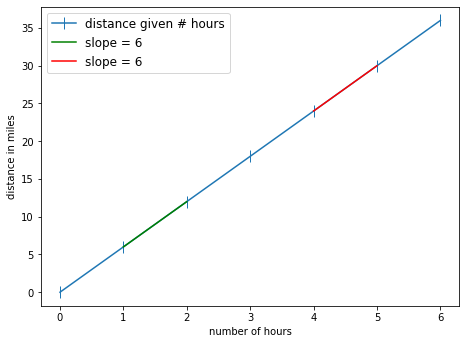

In [26]:
import matplotlib.pyplot as plt
import numpy as np

def jog(miles):
    return 6*miles

fig, ax = plt.subplots(figsize=(7.5,5.5))

x = np.linspace(0, 6, 7)
c1= np.linspace(1,2,20)
c2= np.linspace(4,5,20)

plt.plot(x, jog(x), label = "distance given # hours", marker="|", markersize=12)
plt.plot(c1, jog(c1), label = "slope = 6", color="green")
plt.plot(c2, jog(c2), label = "slope = 6", color="red")

ax.legend(loc='upper left', fontsize='large')
plt.ylabel("distance in miles")
plt.xlabel("number of hours")
plt.show()

Now let's see how this works with our power rule: 

$$f(x) = 6*x = 6*x^{1} $$

Now applying our rule that for a function with 

$$f(x) = x^r $$ 

$$ f'(x) = r*x^{r-1} $$ 

we see that in this case $r = 1$.  So applying our power rule we have: 

$$f'(x) = r*6*x^{r-1} = 1*6*x^{1-1} = 6*x^{0} = 6 $$

Great!  This is aligns with what our graph shows, as well as our calculation using the original definition of the derivative, $\displaystyle\lim_{\Delta x\to0} \dfrac{\Delta y}{\Delta x}$ .

*Another example*

Let's apply the power rule to another example which we used before: the example where the runner starts a race. Here:

$$f(x) = x^2 $$

$$f'(x) = 2*x^{2-1} = 2*x^1 = 2*x $$

Think about what our calculation for $f'(x)$ is saying about our function.  It says, for our function $f(x) = x^2$, a small change in $x$ produces an increase in $f(x) $ equal to 2 times the $ x $ value.  Or, in other words:
$$ f'(x) = 2*x $$

* So when $ x = 2$ then $f'(2) = 2*2 = 4 $
* When $ x = 5 $, then $ f'(5) = 2*5 = 10$
* And when $ x = 10 $, then $ f'(10) = 2*10 = 20$. 

Note that $x$ represents the number of seconds our runner has run, so negative $x$ doesn't make sense here. But there are numerous examples where input variables can be negative, and the same rules are simply applicable here as well. For example, imagine the same function where $x$ represents temperatures.

- when $x=-2$, then $f'(-2) = -4$
- when $x=-7$, then $f'(-7)=-14$

We won't prove the power rule here.  But hopefully, you can see that it does seem to fit our graph of the function $f(x) = x^2$.  Let's take a look.

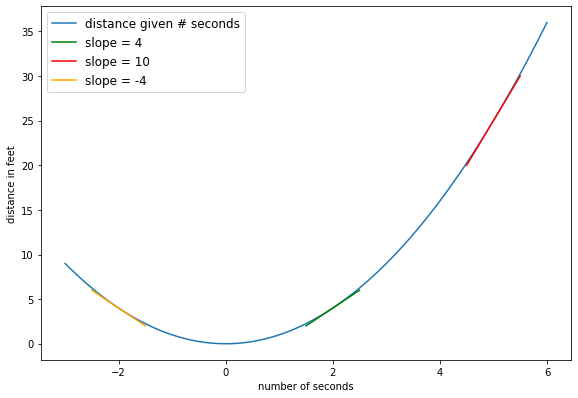

In [27]:
def f(x):
    return np.square(x)
fig, ax = plt.subplots(figsize=(9.5,6.5))

x = np.linspace(-3, 6, 100)
c1= np.linspace(1.5,2.5,20)
c2= np.linspace(4.5,5.5,20)
c3= np.linspace(-2.5,-1.5,20)

plt.plot(x, f(x), label = "distance given # seconds")

x_dev = np.linspace(1.5, 3.2, 100)
a1 = 2
a2 = 5
a3 = -2
delta_a=0.001
fprime1 = (f(a1+delta_a)-f(a1))/delta_a 
fprime2 = (f(a2+delta_a)-f(a2))/delta_a 
fprime3 = (f(a3+delta_a)-f(a3))/delta_a 

tan1 = f(a1)+fprime1*(c1-a1)
tan2 = f(a2)+fprime2*(c2-a2)
tan3 = f(a3)+fprime3*(c3-a3)

# plot of the function and the tangent
plt.plot(c1, tan1, color = "green", label="slope = 4")
plt.plot(c2, tan2, color = "red", label="slope = 10")
plt.plot(c3, tan3, color = "orange", label="slope = -4")

ax.legend(loc='upper left', fontsize='large')

plt.ylabel("distance in feet")
plt.xlabel("number of seconds")
plt.show()

It seems reasonable that the slope of the line tangent to a curve is  2∗𝑥 . So our power rule for derivatives looks good.

### The constant factor rule
After learning the power rule, the constant factor is a breeze.  The constant factor addresses how to take the derivative of a function multiplied by a constant. 
​
So in the above example, we have our function of $f(x) = 6*x$.  Now, the derivative of that function
​
$$f'(x) = 6 * \frac{\Delta f}{\Delta x} $$
​
Applying the power rule, we know that $ \frac{\Delta f}{\Delta x}x^1 = x^{1-1} = 1 $, so we have: 
​
$$f'(x) = 6 * \frac{\Delta f}{\Delta x}x = 6*1 = 6$$
​
In the general case, we can say, consider the function $a*f(x)$ where $a$ is a constant (that is, is a number and not a variable).  Then 
​
$$\frac{\Delta f}{\Delta x}(a*f(x)) = a * \frac{\Delta f}{\Delta x}*f(x) $$  
​
> Now, don't let the fancy equations above confuse you.  The rule simply says if a variable is multiplied by a constant (i.e. a number), then to take the derivative of that term, apply our familiar power rule to the variable and multiply the variable by that same constant.
​
So given the function: 
​
$$f(x) = 2x^2 $$
​
​
$$f'(x) = 2*\frac{\Delta f}{\Delta x} x^{2} = 2*2*x^{2-1} = 4x^1 = 4x $$
​
That's the constant factor rule in action.
### The addition rule
So far, all of our functions consisted of only one term.  Remember that a term is a constant or variable that is separated by a plus or minus sign.  For example, the function $f(x)$ below has three terms:
    
$ f(x) = 4x^3 - x^2 + 3x $
​
To take a derivative of a function that has multiple terms, simply take the derivative of each of the terms individually.  So for the function above, 
​
$$ f(x) = 4x^3 - x^2 + 3x $$
​
$$ f'(x) = 12x^2 - 2x + 3  $$  
​
Do you see what we did there?  We simply applied our previous rules to each of the terms individually and continued to add or subtract the terms accordingly.
## Derivatives Drill
Let's take the last few lines of this lesson to practice these derivative rules.
$$f(x) = 3x^5$$
​
$$g(x) = 10x$$
​
$$ z(x) = 10 $$
What are the derivatives of these respective functions?
​
> Take some time to think through it.  
​
> Even a pen and paper could be in order.
​
> Ok, maybe the pen is too far away...Time for the answers.
$$f(x) = 3x^5$$
$$f'(x) = 15x^4$$
​
$$g(x) = 10x$$
$$g'(x) = 10$$
​
$$ z(x) = 10  $$
$$ z(x) = 10 * (x^0) $$
$$ z'(x) = 0*10x^{0-1} = 0 $$
So as you can see, we are just applying our rule: 
​
$$f(x) = x^r $$ 
​
$$ f'(x) = r*x^{r-1} $$ 
​
And note that whenever we take the derivative of a constant like the number 10, then the derivative of that constant is 0. This also makes sense when thinking of this visually, as the slope of a constant function is 0!
### Evaluating derivatives
Let's evaluate $f'(x)$, $g'(x)$ and $z'(x)$, each at the value where $x = 3$.
Are you able to determine what the derivatives of each of these functions each will equal when $x = 3$?  We simply substitute x for 3, whenever we see $x$.
So:
​
$$f'(3) = 15x^4 = 15*3^4 = 15*81 = 1215 $$
​
$$g'(3) = 10 = 10 $$
​
$$z'(3) = 0 = 0 $$
### Try again
Let's try a couple more derivatives.
$$f(x) = 3x^3 + 8x + 12$$
​
$$g(x) = 12x^2 + 4x^2 + 2$$
Ok, now for the derivatives. 
 Let's see it!
$$f(x) = 3x^3 + 8x + 12$$
$$f'(x) = 9x^2 + 8 $$
​
$$g(x) = 12x^2 + 4x^2 + 2$$
$$g'(x) = 24x + 8x = 32x$$
## Summary
In this lesson, we learned a different way to calculate the derivative.  The derivative of a function at a given point is still the instantaneous rate of change of that function at that point. Now we have three rules that allow us to calculate our derivative.  The most tricky of these is the power rule, which says that if $f(x) = x^r$, then $ f'(x) = r * x^{r-1} $.
​
Using our derivative rules, we can now calculate the derivative across the entire function.  So the derivative of $f(x) = 6x $ is always 6, and the derivative of $f(x) = x^2 $ is $f'(x) = 2x $.  To evaluate our derivative at a specific value of $x$, we simply plug that value of $x$ into our derivative.  When $f'(x) = 2x$, then $f'(2) = 2*2$.  

# Derivatives: Conclusion
## Introduction
​
Data science is all about finding good models to understand patterns in your data. You'll find yourself performing optimizations all the time. Examples are: maximizing model likelihoods and minimizing errors. Essentially, you'll perform a lot of minimizations and maximizations along the way when creating machine learning models. This is where derivatives come in very handy!
## Objectives
​
You will be able to:
- Describe how minima and maxima are related to machine learning and optimization
- Calculate minima and maxima mathematically
## Finding Minima and Maxima
​
To illustrate this point, let's have another look at some functions.
​
For this lecture, we'll use the `derivatives.py`-file containing some functions we have created previously.

In [29]:
from derivatives import *

Let's look at the function $2x^2-8x$ and its derivative. In the code below, we create the `function_values` and `derivative_values` for $x$-es ranging from -6 to 10.

In [30]:
import numpy as np
tuple_sq_pos  = np.array([[2, 2], [-8, 1]])
x_values = np.linspace(-6, 10, 100)
function_values = list(map(lambda x: output_at(tuple_sq_pos, x), x_values))
derivative_values = list(map(lambda x: derivative_at(tuple_sq_pos, x),x_values))

Now, let's look at their plots side by side.

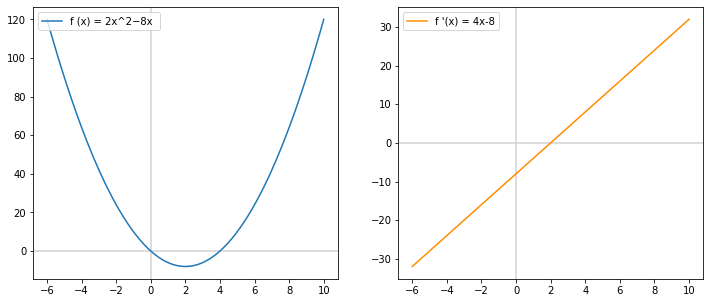

In [31]:
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(figsize=(12,5))

# plot 1
plt.subplot(121)
plt.axhline(y=0, color='lightgrey', )
plt.axvline(x=0, color='lightgrey')
plt.plot(x_values, function_values, label = "f (x) = 2x^2−8x ")

plt.legend(loc="upper left", bbox_to_anchor=[0, 1], ncol=2, fancybox=True)

# plot 2
plt.subplot(122)
plt.axhline(y=0, color='lightgrey')
plt.axvline(x=0, color='lightgrey')
plt.plot(x_values, derivative_values,color="darkorange", label = "f '(x) = 4x-8")

ax.grid(True, which='both')

plt.legend(loc="upper left");

We notice that our function, $2x^2-8x$ reaches a minimum at $x = 2$. Interestingly, it is exactly at $x=2$ that our function $f'(x)$ crosses the x-axis! In mathematical terms $f'(2) = 0$!

This is great... and this is always the case when looking for minima! 

***OK, but what about maxima?***
Let's have a look!

In [32]:
tuple_sq_neg  = np.array([[-3, 2], [30, 1]])
x_values = np.linspace(-4, 12, 100)
function_values = list(map(lambda x: output_at(tuple_sq_neg, x), x_values))
derivative_values = list(map(lambda x: derivative_at(tuple_sq_neg, x),x_values))

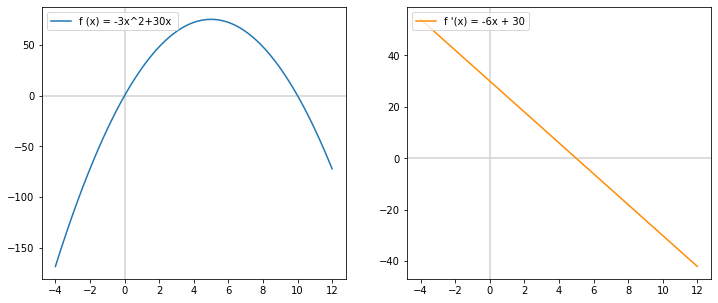

In [33]:
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(figsize=(12,5))

# plot 1
plt.subplot(121)
plt.axhline(y=0, color='lightgrey', )
plt.axvline(x=0, color='lightgrey')
plt.plot(x_values, function_values, label = "f (x) = -3x^2+30x ")

plt.legend(loc="upper left", bbox_to_anchor=[0, 1], ncol=2, fancybox=True)

# plot 2
plt.subplot(122)
plt.axhline(y=0, color='lightgrey')
plt.axvline(x=0, color='lightgrey')
plt.plot(x_values, derivative_values,color="darkorange", label = "f '(x) = -6x + 30")

ax.grid(True, which='both')

plt.legend(loc="upper left");

You can see that here, $-3x^2+30x$ reaches a maximum at $x=5$. Similarly to what you've seen before like, we see that $f'(x) = 0$ when $x = 5$. So, in conclusion, minima or maxima can easily be found when looking at the derivative of a function. 
## How Does This Happen?
To understand what's happening, let's take a minute to refreshen our memories. Remember that a derivative is the ***instantaneous rate of change*** or the ***slope*** of a function at a certain point $x$. Then, think about what happens when you reach a minimum or a maximum. Essentially, your slope changes from positive to negative for a maximum, and from negative to positive for a minimum. That is exactly what we see in the derivative functions: there is a change in sign for the $f'(x)$ values whenever $f(x)$ reaches a maximum or a minimum!
## Finding Minima or Maxima Mathematically
It is great to see this visually, but it is also easy to find minima or maxima just using the function expressions for  𝑓(𝑥)  and  𝑓′(𝑥) .

Let's look at our first example:
​
$f(x) = 2x^2-8x$
​
Then, we know that
​
$f'(x) = 4 x - 8 $
​
We know that $f(x)$ reaches an optimum (in this case, a minimum) for $f'(x) = 0$
​
So, we need to solve for $x$ as follows:
​
$$4x - 8 = 0 $$
$$ 4x = 8$$
$$ x= 2$$
​
And this is exactly where $f(x)$ reaches the minimum!
​
Great, now try this yourself for $-3x^2+30$!
## Summary
​
Great! That was quite a bit of theory. Now, all this will help you to code a more complicated linear regression model from scratch using gradient descent. That's what you'll do next!

# Rules for Derivatives - Lab

## Introduction

In this lab, we will practice implementing the rules for derivatives with code.  This lab will review your understanding of the following rules:

1. The power rule
2. The constant factor rule
3. The addition rule

## Objectives

You will be able to:

- Calculate derivatives of more complex functions by using power rules, constant factor and the addition rule
- Use python functions to demonstrate derivatives of functions

## Let's get started!

As you know we can represent polynomial functions as a numpy array in Python: 

* Each term is represented as a row, for example, $2x^3$ is expressed as `(2, 3)`.
* And an entire function is expressed as 2D numpy array, like $f(x)=2x^3+7x$ is expressed as `np.array([[2, 3], [7, 1]])`.
* Between columns in our array, we imagine there is a plus sign. To subtract elements we simply place a negative sign before the first element in the row. For example, $f(x)= x^2 - 4x$ is represented as `np.array([[1, 2], [-4, 1]])`. 

### Writing our derivative functions

Let's start by writing a function called `find_term_derivative` that returns the derivative of a single term.  The function takes the derivative of one term represented as an array, say $(1, 3)$, and returns its derivative, also represented as an array.  For example, if the function is $f(x) = 2x^4$ so its derivative is $f'(x) = 8x^3$, then our function `find_term_derivative` should take an input of `(2, 4)` and return `(8, 3)`.

In writing `find_term_derivative`, let's first consider the function $f(x) = x^3$, and write the function so that it takes the derivative of the term.

In [34]:
import numpy as np
array_cubed_1 = np.array([1, 3])
array_cubed_1

def find_term_derivative(term):
    constant = term[0]*term[1]
    exponent = term[1] - 1 
    return np.array([constant, exponent])
# return something which looks like: np.array([constant, exponent])

# use find_term_derivative on array_cubed_1
find_term_derivative(array_cubed_1) 
# array([3, 2])

array([3, 2])

Let's try the function with $f(x) = 2x^2$.

In [35]:
array_squared = np.array([2, 2])
# use find_term_derivative on array_squared
find_term_derivative(array_squared)
# array([4, 1])

array([4, 1])

Ok, now that we have a Python function called `find_derivative` that can take a derivative of a term, write a function that takes our multi-termed function as an argument, and returns the derivative of the multi-term function represented as a 2D array. 

For example, if the derivative of a function $f(x)$ is $f'(x) = 2x^3 + 4x^2$, then the function `find_derivative` should return `[(2, 3), (4, 2)]`.

> Imagine that a plus sign separates each of our terms.  Again, if we need a negative term, then we add a minus sign to the first element of the row.

In [36]:
def find_derivative(function_terms):
    der_array = np.zeros(np.shape(function_terms))
    for i in range(int(np.shape(function_terms)[0])):
        der_array[i] = find_term_derivative(function_terms[i])
    return der_array

Let's apply this function to $f(x) = 4x^3 - 3x$.

In [37]:
array_cubed_2 = np.array([[4,3],[-3,1]])
find_derivative(array_cubed_2)
# [(12, 2), (-3, 0)]

array([[12.,  2.],
       [-3.,  0.]])

One gotcha to note is when one of our terms is a constant, when taking the derivative, the constant will be equal to 0, while the exponent technically becomes negative (-1).  For example, when $f(x) = 3x^2 - 11$, the derivative $f'(x) = 6x$.  The reason why is because 11 is the same as $11*x^0$ which is also $11*1$, as anything raised to the zero power equals 1. And so the derivative of the term $11x^0$ equals $0*11*x^{-1} = 0$.  Our `find_derivative` function should return a zero for the constant and -1 for the exponent.  Let's store $f(x) = 3x^2 - 11$ in `array_squared_1` and apply `find_derivative` to it.

In [38]:
array_squared_1 = [(3, 2), (-11, 0)]
# use find_derivative on array_squared_1
find_derivative(array_squared_1) 
# array([[6., 1.],
#       [0., 0.]])

array([[ 6.,  1.],
       [ 0., -1.]])

Our next function is called, `derivative_at` which, when provided a list of terms and a value $x$ at which to evaluate the derivative, returns the value of the derivative at that point.

In [39]:
def derivative_at(terms, x):
    derivative_fn = find_derivative(terms)
    total = 0
    for term in derivative_fn:
        total += term[0]*x**term[1]
    return total

# apply find_derivative to array_squared_1
find_derivative(array_squared_1) 
# array([[6., 1.],
#       [0., 0.]])

# apply derivative_at to array_squared_1, looking to get the derivative at x=2
derivative_at(array_squared_1, 2)
# 12

12.0

### Creating visualizations with our functions

Now that we have done the work of calculating the derivatives, we can begin to show the derivatives of functions with matplotlib. We have plotted derivatives previously, but we had to consider $\Delta x$ to do so.  Notice that with our rules, we no longer need to include $\Delta x$ as a parameter for our derivative calculating functions.  Similarly, we will not need to include $\Delta x$ as a parameter for our line tracing functions below.

#### Plotting the tangent line

First, let's take our `derivative_at` function, and use that in the `tangent_line` function below to display this calculation. The `derivative_at` a point on our function equals the slope of the tangent line, so we use the function to generate a `tangent_line` trace with the function below. You can use the `output_at` which we created in a previous lab in your `tangent_line` function.

In [40]:
def term_output(term, input_value):
    return term[0]*input_value**term[1]

def output_at(array_of_terms, x_value):
    outputs = []
    for i in range(int(np.shape(array_of_terms)[0])):
        outputs.append(array_of_terms[i][0]*x_value**array_of_terms[i][1])
    return sum(outputs)

import numpy as np

def tangent_line(list_of_terms, x_value, line_length = 4):
    y = output_at(list_of_terms, x_value)
    deriv = derivative_at(list_of_terms, x_value)
    
    x_dev = np.linspace(x_value - line_length/2, x_value + line_length/2, 50)
    tan = y + deriv *(x_dev - x_value)
    return {'x_dev':x_dev, 'tan':tan, 'lab': " f' (x) = " + str(deriv)}

Now, let's apply our function `tangent_line` to `array_squared_1`. Let's assume we want a tangent line for $x=5$ and a line length of 6.

In [41]:
tan_line = tangent_line(array_squared_1, 5, 6)
tan_line

{'x_dev': array([2.        , 2.12244898, 2.24489796, 2.36734694, 2.48979592,
        2.6122449 , 2.73469388, 2.85714286, 2.97959184, 3.10204082,
        3.2244898 , 3.34693878, 3.46938776, 3.59183673, 3.71428571,
        3.83673469, 3.95918367, 4.08163265, 4.20408163, 4.32653061,
        4.44897959, 4.57142857, 4.69387755, 4.81632653, 4.93877551,
        5.06122449, 5.18367347, 5.30612245, 5.42857143, 5.55102041,
        5.67346939, 5.79591837, 5.91836735, 6.04081633, 6.16326531,
        6.28571429, 6.40816327, 6.53061224, 6.65306122, 6.7755102 ,
        6.89795918, 7.02040816, 7.14285714, 7.26530612, 7.3877551 ,
        7.51020408, 7.63265306, 7.75510204, 7.87755102, 8.        ]),
 'tan': array([-26.        , -22.32653061, -18.65306122, -14.97959184,
        -11.30612245,  -7.63265306,  -3.95918367,  -0.28571429,
          3.3877551 ,   7.06122449,  10.73469388,  14.40816327,
         18.08163265,  21.75510204,  25.42857143,  29.10204082,
         32.7755102 ,  36.44897959,  40.122448

Now, let's plot our function $f(x) = 3x^2 + 11$ along with the tangent line for $x=5$

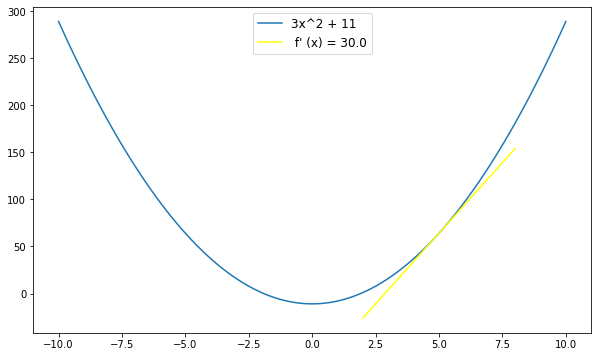

In [42]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

fig, ax = plt.subplots(figsize=(10,6))

x_values = np.linspace(-10, 10, 100)
y_values = list(map(lambda x: output_at(array_squared_1, x), x_values))

plt.plot(x_values, y_values, label = "3x^2 + 11")
plt.plot(tan_line['x_dev'], tan_line['tan'], color = "yellow", label = tan_line['lab'])

ax.legend(loc='upper center', fontsize='large');

#### Graphing the derivative across a range of values

We can also write a function that given a list of terms can plot the derivative across multiple values. After all, the derivative is just a function. For example, when $f(x) = 3x^2 - 11$, the derivative is $f'(x) = 6x$. Recall that we have our function $f(x) = 3x^2 - 11$ saved in `array_squared_1`.

In [43]:
array_squared_1 = np.array([[3, 2], [-11, 0]])

Now, you can use `np.linspace` to generate $x$-values between -10 and 10. Next you can use the `output_at` function and the `derivative_at` function along with lambda functions to generate $f(x)$ and $f'(x)$ respectively.

In [44]:
x_values = np.linspace(-10, 10, 100)
function_values = list(map(lambda x: output_at(array_squared_1, x), x_values))
derivative_values = list(map(lambda x: derivative_at(array_squared_1, x),x_values))

Now, let's plot $f(x)$ and $f'(x)$ side by side.

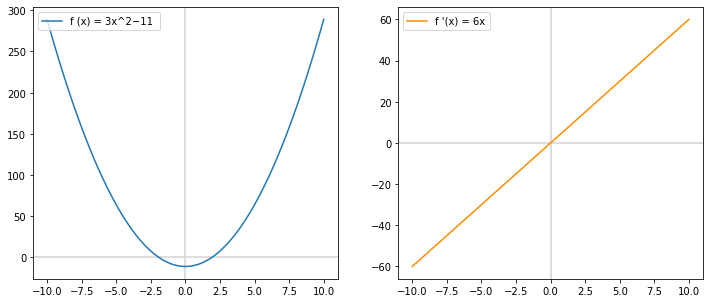

In [45]:
fig, ax = plt.subplots(figsize=(12,5))

# plot 1
plt.subplot(121)
plt.axhline(y=0, color='lightgrey', )
plt.axvline(x=0, color='lightgrey')
plt.plot(x_values, function_values, label = "f (x) = 3x^2−11 ")

plt.legend(loc="upper left", bbox_to_anchor=[0, 1], ncol=2, fancybox=True)

# plot 2
plt.subplot(122)
plt.axhline(y=0, color='lightgrey')
plt.axvline(x=0, color='lightgrey')
plt.plot(x_values, derivative_values,color="darkorange", label = "f '(x) = 6x")

ax.grid(True, which='both')

plt.legend(loc="upper left");

Note that when the  𝑥  values of  𝑓(𝑥)  are positive, the  𝑓(𝑥)  begins increasing, therefore  𝑓′(𝑥)  is greater than zero, which the graph on the right displays. And the more positive the values  𝑥  for  𝑓(𝑥) , the faster the rate of increase. When our function  𝑓(𝑥)  is negative, the function is decreasing, that is for every change in  𝑥 , the change in  𝑓(𝑥)  is negative, and therefore  𝑓′(𝑥)  is negative.

## Summary
​
In this lab, you practiced implementing the rules for derivatives with Python code using NumPy. This lab will review your understanding of the following rules:
​
1. The power rule
2. The constant factor rule
3. The addition rule

# Derivatives: the Chain Rule

## Introduction

So far we have seen that the derivative of a function is the instantaneous rate of change of that function.  In other words, how does a function's output change as we change one of the variables?  In this lesson, you will learn about the chain rule, which will allow you to see how a function's output change as we change a variable that function does not directly depend on.  The chain rule may seem complicated, but it is just a matter of following the prescribed procedure.  Learning about the chain rule will allow you to take the derivative of more complicated functions that we will encounter in machine learning.

## Objectives

You will be able to:
- Use chain rule to calculate the derivative of composite funtions

## The chain rule

Ok, now let's talk about the chain rule.  Imagine that we would like to take the derivative of the following function:

$$f(x) = (0.5x + 3)^2 $$ 

Doing something like that can be pretty tricky right off the bat.  Lucky for us, we can use the chain rule.  The chain rule is essentially a trick that can be applied when our functions get complicated.  The first step is using functional composition to break our function down. Ok, let's do it.

$$g(x) = 0.5x + 3 $$
$$f(x) = (g(x))^2$$

Let's turn these two into functions while we are at it.

In [46]:
def g_of_x(x):
    return 0.5*x + 3
g_of_x(2) # 4

4.0

In [47]:
def f_of_x(x):
    return (g_of_x(x))**2
f_of_x(2) # 16

16.0

Looking at both the mathematical and code representations of $f(x)$ and $g(x)$, we can see that the $f(x)$ function wraps the $g(x)$ function.  So let's call $f(x)$ **the outer function**, and $g(x)$ **the inner function**.
```python

def g_of_x(x):
    return 0.5*x + 3
    
def f_of_x(x): # outer function f(x) 
    return (g_of_x(x))**2 #inner function g(x)
    
```
Ok, so now let's begin to take derivatives of these functions, starting with the derivative of $g(x)$, the inner function.
From our rules about derivatives we know that the power rule tells us that the derivative of $g(x) = 0.5x$ is 

$$g'(x) = 1*0.5x^0 = 0.5$$
Now a trickier question is: what is the derivative of our outer function $f(x)$? How does the output of our outer function, $f(x)$, change as we vary $x$? 

Notice that the outer function $f(x)$'s output does not directly vary with $x$. As $f(x)=(g(x))^2$, its output varies based on the output, $g(x)$, whose output varies with $x$.
> ** The chain rule**: In taking the derivative, $\frac{\Delta f}{\Delta x}$ of an outer function, $f(x)$, which depends on an inner function $g(x)$, which depends on $x$, the derivative equals the derivative of the outer function times the derivative of the inner function.  

**Or: **

More generally, if we let $ F(x) = f(g(x)) $

$$ F'(x) = f'(g(x))*g'(x) $$
## Work through our steps
Ok, so that is the chain rule.  Let's apply this to our example.
### 1. Separate the function into two functions
Remember we started with the function $f(x) = (0.5x + 3)^2 $.  Then we used functional composition to split this into two.

$$g(x) = (0.5x + 3)$$
$$f(x) = (g(x))^2$$

### 2. Find the derivatives, $f'(x)$ and $g'(x)$

* as we know $g'(x) = 0.5$
* and $f'(g(x)) = 2*(g(x))^{1} = 2*g(x)$

### 3. Substitute into our chain rule

We have: 
* $ f'(g(x)) = f'g(x)*g'(x) = 2*g(x)*0.5 = 1*g(x)$

Then substituting for $g(x)$, which we already defined, we have: 

$f'(g(x)) = g(x) = (0.5x + 3)$

So the derivative of the function $f(x) = (0.5x + 3)^2 $ is $f'(x) = (0.5x + 3) $
### Say it again
The chain rule is allows us to the rate of change of a function that does not directly depend on a variable, $x$, but rather depends on a separate function, that depends on $x$.  For example, the function $f(x)$ below.

```python

def g_of_x(x):
    return 0.5*x + 3
    
def f_of_x(x): # outer function f(x) 
    return (g_of_x(x))**2 #inner function g(x)
    
```

It does not directly depend on $x$, but it does depend on a function $g(x)$, which varies with different outputs of $x$.  So now we want to take the derivative of $f(x)$.

> Remember, taking a derivative means changing a variable $x$ a little, and seeing the change in the output.  The chain rule allows us to solve the problem of seeing the change in output when our function does not **directly** depend on that changing variable; rather, it depends on **a function ** that depends on a variable.  

We can take the derivative of a function that indirectly depends on $x$, by taking the derivative of the outer function and multiplying it by the derivative of the inner function, or 

$f'(x) = f'(g(x))*g'(x)$


## Try it again
Let's go through some more examples.

$$ f(x) = (3x^2 + 10x)^3$$

> Stop here, and give this a shot on your own.  The answer will always be waiting for you right below, so you really have nothing to lose.  No one will know if you struggle - and it's kinda the point.

### 1. Divide the function into two components 

$$g(x) = 3x^2 + 10x $$
$$f(x) = (g(x))^3$$


### 2. Take the derivative of each of the component functions 

$$g'(x) = 6x + 10 $$
$$f'(x) = 3(g(x))^2$$

### 3. Substitution 

$$f'(x) = f'(g(x))*g'(x) = 3(g(x))^2*(6x+10)$$

Then substituting in $g(x) = 3x^2 + 10x $ we have:

$$f'(x) = 3*(3x^2 + 10x)^2*(6x+10) $$

And we can leave it there for now.

## Summary
In this lesson, we learned about the chain rule. The chain rule allows us to take the derivative of a function that comprises of another function that depends on $x$. We apply the chain by taking the derivative of the outer function and multiplying that by the derivative of the inner function. We'll see the chain rule in the future when in our work with gradient descent.

# Gradient to Cost Function - Appendix

## Introduction

In this lesson, you'll find the details on how to compute the partial derivatives in the "Gradient to cost function" lesson.

## Computing the First Partial Derivative

Let's start with taking the **partial derivative** with respect to $m$.

$$\frac{\delta J}{\delta m}J(m, b) = \frac{\delta J}{\delta m}(y - (mx + b))^2$$

Now this is a tricky function to take the derivative of.  So we can use functional composition followed by the chain rule to make it easier.  Using functional composition, we can rewrite our function $J$ as two functions: 

$$
\begin{align}
g(m,b)&= y - (mx + b) &&\text{set $g$ equal to $y-\hat{y}$}\\
\\
J(g(m,b))&= (g(m,b))^2 &&\text{now $J$ is a function of $g$ and $J=g^2$}\\
\end{align}
$$

Now using the chain rule to find the partial derivative with respect to a change in the slope, gives us:

$$
[1]\mspace{5ex}\frac{dJ}{dm}J(g) = \frac{dJ}{dg}J(g(m, b))*\frac{dg}{dm}g(m,b)
$$

Because **g** is a function of **m** we get $\boldsymbol{\frac{dg}{dm}}(g)$ and 

**J** is a function of **g (which is a function of m**) we get $\boldsymbol{\frac{dJ}{dg}}(J)$.

Our next step is to solve these derivatives individually: 
$$
\begin{align}
\frac{dJ}{dg}J(g(m, b))&=\frac{dJ}{dg}g(m,b)^2 &&\text{Solve $\boldsymbol{\frac{dJ}{dg}}(J)$}\\
\\
&= 2*g(m,b)\\
\\
\frac{dg}{dm}g(m,b)&=\frac{dg}{dm} (y - (mx +b)) &&\text{Solve $\boldsymbol{\frac{dg}{dm}}(g)$}\\
\\
&=\frac{dg}{dm} (y - mx - b)\\
\\
&=\frac{dg}{dm}y - \frac{dg}{dm}mx - \frac{dg}{dm}b\\
\\
&= 0-x-0\\
\\
&=-x\\
\end{align}
$$

> Each of the terms are treated as constants, except for the middle term.  

Now plugging these back into our chain rule [1] we have: 
$$
\begin{align}
\color{blue}{\frac{dJ}{dg}J(g(m,b))}*\color{red}{\frac{dg}{dm}g(m,b)}&=\color{blue}{(2*g(m,b))}*\color{red}{-x}\\
\\
&= 2*(y - (mx + b))*-x
\\
\end{align}
$$
 So
 
$$
\begin{align}
[1]\mspace{5ex}\frac{\delta J}{\delta m}J(m, b)&=2*(y - (mx + b))*-x\\
\\
&= -2x*(y - (mx + b ))\\
\end{align}
$$

## Computing the Second Partial Derivative

Ok, now let's calculate the partial derivative with respect to a change in the y-intercept.  We express this mathematically with the following:

$$\frac{\delta J}{\delta b}J(m, b) = \frac{dJ}{db}(y - (mx + b))^2$$

Then once again, we use functional composition following by the chain rule.  So we view our cost function as the same two functions $g(m,b)$ and $J(g(m,b))$.  

$$g(m,b) = y - (mx + b)$$

$$J(g(m,b)) = (g(m,b))^2$$

So applying the chain rule, to this same function composition, we get:

$$[2]\mspace{5ex}\frac{dJ}{db}J(g) = \frac{dJ}{dg}J(g)*\frac{dg}{db}g(m,b)$$

Now, our next step is to calculate these partial derivatives individually.

From our earlier calculation of the partial derivative, we know that $\frac{dJ}{dg}J(g(m,b)) = \frac{dJ}{dg}g(m,b)^2 = 2*g(m,b)$.  The only thing left to calculate is $\frac{dg}{db}g(m,b)$.

$$
\begin{align}
\frac{dg}{db}g(m,b)&=\frac{dg}{db}(y - (mx + b) )\\
\\
&=\frac{dg}{db}(y-mx-b)\\
\\
&=\frac{db}{db}y-\frac{db}{db}mx-\frac{dg}{db}b\\
\\
&=0-0-1\\
\\
&= -1\\
\end{align}
$$

Now we plug our terms into our chain rule [2] and get: 

$$
\begin{align}
\color{blue}{\frac{dJ}{dg}J(g)}*\color{red}{\frac{dg}{db}g(m,b)}&= \color{blue}{2*g(m,b)}*\color{red}{-1}\\
\\
&= -2*(y - (mx + b))\\
\end{align}
$$